In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
mlp_list = [
    'mlp_window(protein_augmented)', 
    'augmented_mlp_window',
    'augmented_mlp_window_important_cts',
    'augmented_mlp_window_important_plus10'
]

rnn_list = [
    'rnn_basic(protein_augmented)',
    'augmented_rnn_basic',
    'augmented_rnn_important_features_cts',
    'augmented_rnn_important_features_plus10'
]

colors = ['b', 'r', 'g', 'orange']
mlp_labels  = [
    'basic MLP', 
    'Augmented MLP with all features',
    'Augmented MLP with selected 57 features',
    'Augmented MLP with selected 10 features',
]
rnn_labels  = [
    'basic RNN', 
    'Augmented RNN with all features',
    'Augmented RNN with selected 57 features',
    'Augmented RNN with selected 10 features',
]

mlp_names = [f'cv_result_{name}_5_100_20.csv' for name in mlp_list]
rnn_names = [f'cv_result_{name}_2_100_5_100_20.csv' for name in rnn_list]

In [12]:
benchmarks = [
    [3.17, 48.55],
    [5.05, 31.27],
    [6.89, 14.36],
    [8.68, 3.82],
    [3.90, 65.09],
    [6.20, 49.09]
]
mauli = [
    [1.37, 98.58],
    [3.10, 39.82],
    [0.90, 38.94],
    [0.92, 10.93],
    [0.78, 39.38],
    [0.85, 38.94]
]

bench_colors = ['b', 'r', 'g', 'orange', 'k', 'brown']
benchmark_label = ['YoY+', 'YoY++', 'YoY+++', 'YoY++++', 'OGP-II', 'OGP-Site']
Mauli_label = ['RF', 'GBT', 'SVM Linear', 'SVM Polynom.', 'SVM Radial', 'SVM Sigmoid']

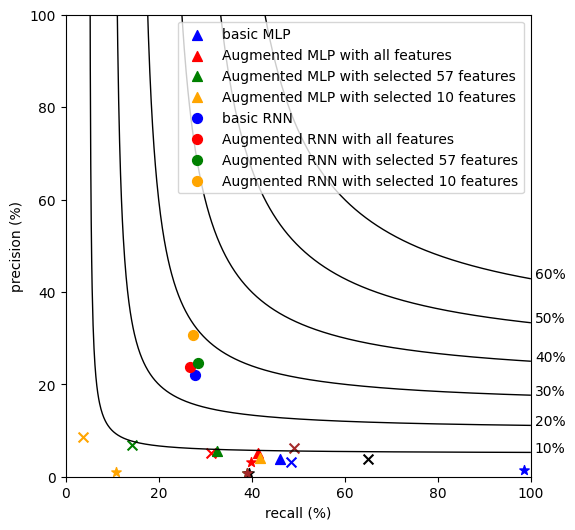

In [13]:
x = np.linspace(0, 100, 1000, endpoint=False)
fs = [10, 20, 30, 40, 50, 60]
e = 1e-10

plt.figure(figsize=(6,6))
for f in fs:
    y = -f*x/(f-2*x+e)
    x = x[y>0]
    y = y[y>0]

    plt.plot(x,y, color='k', linewidth=1)
    plt.text(x[-1]+1, y[-1], f'{f}%')
    plt.xlim(0,100)
    plt.ylim(0,100)
    
plt.ylabel('precision (%)')
plt.xlabel('recall (%)')

for data, color, label in zip(benchmarks, bench_colors, benchmark_label):
    plt.scatter(data[1], data[0], c=color, alpha=1, s=50, marker='x')
    
for data, color, label in zip(mauli, bench_colors, Mauli_label):
    plt.scatter(data[1], data[0], c=color, alpha=1, s=50, marker='*')

for name, color, label in zip(mlp_names, colors, mlp_labels):
    data = pd.read_csv(f'./result/{name}').mean(axis=0)
    plt.scatter(data['recall'], data['precision'], c=color, alpha=1, s=50, label=label, marker='^')
    
for name, color, label in zip(rnn_names, colors, rnn_labels):
    data = pd.read_csv(f'./result/{name}').mean(axis=0)
    plt.scatter(data['recall'], data['precision'], c=color, alpha=1, s=50, label=label, marker='o')

plt.legend()
plt.show()

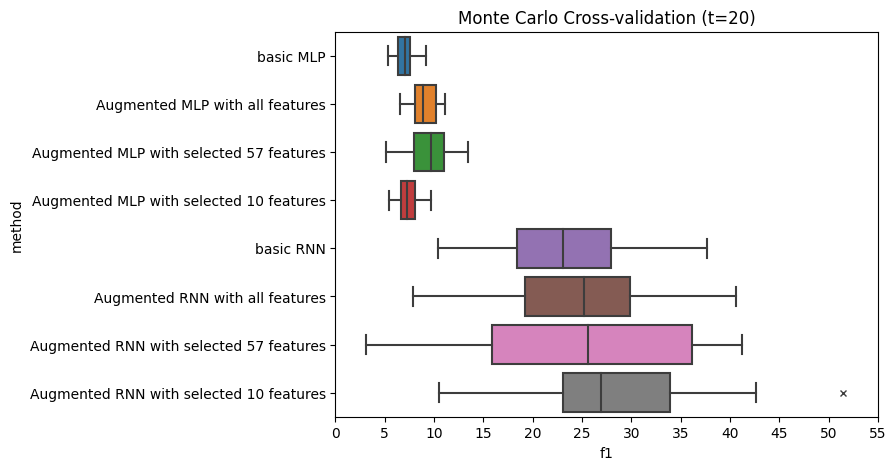

In [14]:
dataframe = []
for name, label in zip(mlp_names+rnn_names, mlp_labels+rnn_labels):
    data = pd.read_csv(f'./result/{name}')
    data = data[['accuracy', 'precision', 'recall', 'f1']]
    data['method'] = label
    dataframe.append(data)
    
dataframe = pd.concat(dataframe)

plt.figure(figsize=(7,5))
sns.boxplot(data=dataframe, x = 'f1', y='method', flierprops={'marker':'x'})
plt.xlim(0, 55)
plt.xticks([5*x for x in range(12)])
plt.title('Monte Carlo Cross-validation (t=20)')
plt.show()